<a href="https://colab.research.google.com/github/kooose38/create_model/blob/dev/stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 共分散(convariance)

あるデータの変数x,yが存在しているとする。  
それぞれの偏差は [x-mean(x)]() [y-mean(y)]() となり、2変数間の関係は各データのおいての偏差の積の平均値を共分散で示せる。  
つまり２変数間での **相関関係** ととらえることができる。共分散が大きいほどデータの影響率は高く最大で、変数xが決まればyも法則ののもとで決まってしまう関係性といえる。



```
 convariance = sum( (x-mean(x) * (y-mean(y) )/len(x)
```
正の値であれば、右肩上がり。負であれば、右肩下がり。  
共分散が高すぎると、ほぼ同じデータと一緒の扱いになるので標本としては不適切。あるデータに偏った予測値になってしまう(過学習しやすい)  

なお、無相関の場合は [x-mean(x)]()*[y-mean(y)]() が **0**であるのでどちらかの変数が分散０、または２変数間のデータのばらつきが一定。


In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 

In [2]:
weight=[42,44,49,55,59,61,62,66,70,72,80]
height=[150,152,155,158,160,161,166,170,177,180,188]
len(weight),len(height)

(11, 11)

共分散

In [ ]:
weight_mean=np.mean(weight)
height_mean=np.mean(height)

conv=np.sum((weight-weight_mean)*(height-height_mean))/len(weight)
conv

128.72727272727272

Pandasの使って共分散を求めてみる。

In [ ]:
df=pd.DataFrame({'weight':weight,'height':height})
df.cov() # 不偏分散、共分散

,weight,height
weight,141.2,141.600000
height,141.6,150.763636


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


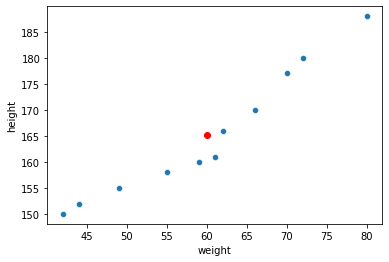

In [ ]:
sns.scatterplot(weight,height)
plt.xlabel('weight')
plt.ylabel('height')
plt.plot(weight_mean,height_mean,'ro')
plt.show()

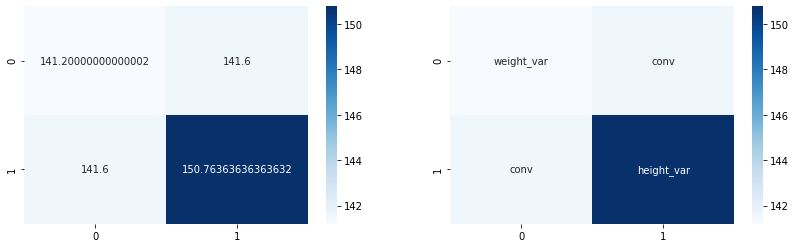

In [ ]:
conv=np.cov(weight,height)

plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.heatmap(data=conv,annot=True,fmt='',cmap='Blues')

plt.subplot(1,2,2)
labels=np.array([['weight_var','conv'],['conv','height_var']])
sns.heatmap(data=conv,fmt='',annot=labels,cmap='Blues')

# 相関係数(r)
ここで、完全な正負の相関関係について考えてみる。これは変数xが決まればyも決まると言え、データは一直線上に位置するといえる。  
つまり、


```
 y = ax + b | y = -ax + b
```
にすべてのデータが集合し、[xの標準偏差Sx]()と[yの標準偏差Sy]()は、


```
 Sy = a * Sx | Sy = -a * Sx
```
の関係性だといえる。同じ割合でデータが散らばってる。。。ベクトルは変わっても割合に変化はないはず。  
以上より、[xyの共分散 Sxy]()は、


```
 -(Sx * aSx) <= Sxy <= (Sx * aSx) 
```
の範囲内であるといえる。  
データを統一すると、


```
 -1 <= Sxy / (Sx * aSx) <= 1 
```
であり、これを**相関係数(r)**という。  


```
 r = Sxy / (Sx * Sy)
```










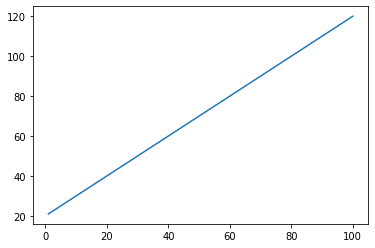

In [ ]:
x=np.linspace(1,100,50)
y=x+20

plt.plot(x,y)

相関係数が0.97は正の相関が高い。

In [ ]:
df.corr()

,weight,height
weight,1.000000,0.970505
height,0.970505,1.000000


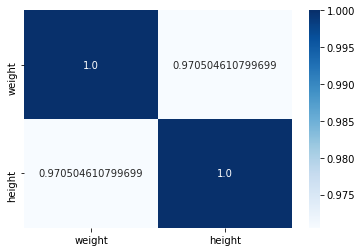

In [ ]:
sns.heatmap(data=df.corr(),annot=True,fmt='',cmap='Blues')

Numpyを使わず求めてみる

In [ ]:
weight_mean=np.sum(weight)/len(weight)
height_mean=np.sum(height)/len(height)
#２変数間の偏差の平均で共分散を求める
conv=np.sum((weight-weight_mean)*(height-height_mean))/len(weight)
#標準偏差
w_var=np.sum((weight-weight_mean)**2)/len(weight)
h_var=np.sum((height-height_mean)**2)/len(height)
w_std=np.sqrt(w_var)
h_std=np.sqrt(h_var)
#相関係数のデータの範囲は-1,1
#データの影響力/２変数間の偏差
r=conv/(w_std*h_std)
r

0.970504610799699

In [ ]:
def make_values(r=0.5,num=1000):
  a=np.random.randn(num)
  b=np.random.randn(num)
  c=np.random.randn(num)
  
  if r<0:
    r=-r
    x=-np.sqrt(r)*a-np.sqrt(1-r)*b
  else:
    x=np.sqrt(r)*a+np.sqrt(1-r)*b
  y=np.sqrt(r)*a+np.sqrt(1-r)*c

  r=np.corrcoef(x,y)
  return x,y,r

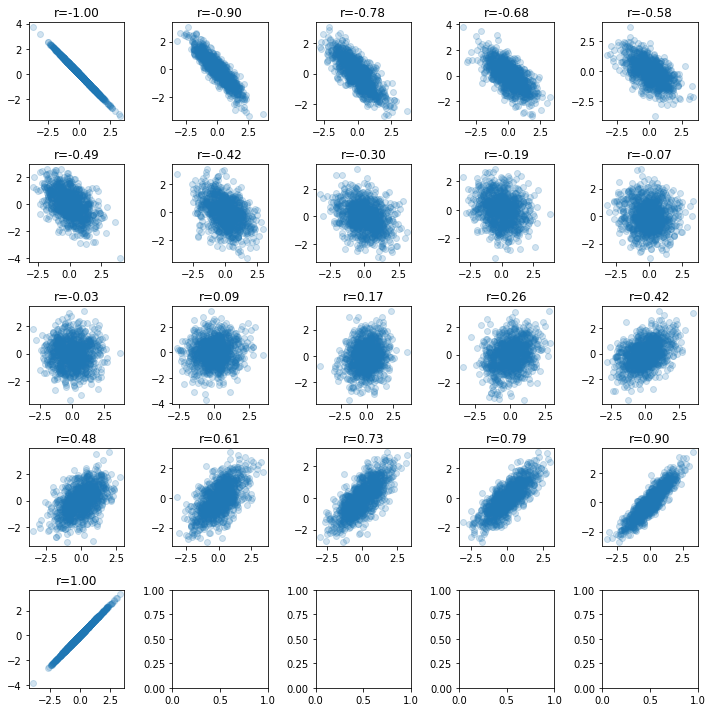

In [ ]:

fig,axes=plt.subplots(5,5,figsize=(10,10))
ax=axes.ravel()
array=np.arange(-1,1.1,0.1)
for i,arr in enumerate(array):
  x,y,r=make_values(r=arr)
  ax[i].scatter(x,y,alpha=0.2)
  ax[i].set_title('r={:.2f}'.format(r[0,1]))
plt.tight_layout()

## regression line


予測値(y)を変数(x)から求める。  
ある値(x1)の時の平均値がy1で表され、それぞれの変数で求めた平均を直線であらわらしたものといえる。つまり、変数xが変数yの平均を決める。  
両変数の平均値を必ず通る。

```
 y = wx + b
```
なお重み[w]()は、相関係数と偏差が影響している。


```
 w = r * (Sy / Sx)
```
バイアスは(mean(x), mean(y))を通る直線になるよう調整される。




```
 b = mean(y) - w * mean(x)
```






基準として[平均２乗誤差]()。目的関数が最小になるような線を求める。

```
 loss = sum( (t - y)**2 ) / len(x)  
```




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


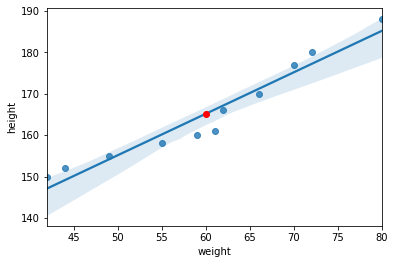

In [5]:
sns.regplot(weight,height)
plt.plot(np.mean(weight), np.mean(height), 'ro')
plt.xlabel('weight')
plt.ylabel('height')
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [9]:
X,xx,T,tt=train_test_split(np.array(height).reshape(-1,1), np.array(weight), random_state=0)
model=LinearRegression().fit(X,T)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

重み[ w ](), [ bias ]()

In [10]:
model.coef_, model.intercept_

(array([0.96846652]), -100.03909287257025)

In [28]:
X=X.ravel()

x_mean=np.mean(X)
t_mean=np.mean(T)

x_var=np.sum((X-x_mean)**2)/len(X)
t_var=np.sum((T-t_mean)**2)/len(T)

x_std=np.sqrt(x_var)
t_std=np.sqrt(t_var)

conv=sum((X-x_mean)*(T-t_mean))/len(X)

r=conv/(t_std*x_std)

w=r*(t_std/x_std)

b=t_mean-r*x_mean
w,b 

(0.9684665226781858, -100.84007690684581)

予測値

In [29]:
y=w*xx+b
y

array([[54.11456672],
       [73.48389718],
       [49.27223411]])

実際の値

In [30]:
tt

array([59, 72, 49])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


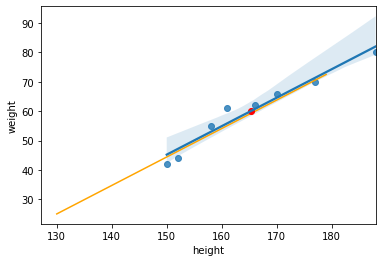

In [36]:
dummy=np.arange(130,180,1)

y=w*dummy+b

plt.plot(dummy,y,'orange')
plt.plot(np.mean(X), np.mean(T), 'ro')
sns.regplot(X,T)
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

In [39]:
X,xx,T,tt=train_test_split(np.array(weight).reshape(-1,1), np.array(height), random_state=0)
model1=LinearRegression().fit(X,T)
model1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
model1.coef_, model1.intercept_

(array([0.97818499]), 106.5589005235602)

In [47]:
X=X.ravel()

x_mean=np.mean(X)
t_mean=np.mean(T)

x_var=np.sum((X-x_mean)**2)/len(X)
t_var=np.sum((T-t_mean)**2)/len(T)

x_std=np.sqrt(x_var)
t_std=np.sqrt(t_var)

conv=np.sum((X-x_mean)*(T-t_mean))/len(X)

r=conv/(x_std*t_std)

w=r*(t_std/x_std)
b=t_mean-r*x_mean
w,b

(0.9781849912739964, 106.85118236362634)

In [48]:
T=T.reshape(-1,1)
y=(T-b)/w
y

array([[82.95855933],
       [60.46792597],
       [46.15570474],
       [64.55713204],
       [71.71324265],
       [52.28951384],
       [44.1111017 ],
       [55.35641839]])

heightからweightを予測する回帰直線とweightからheightを予測する回帰直線の式を変形してweightを予測した直線の差。

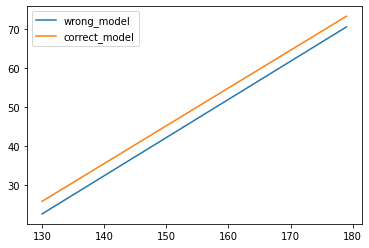

In [51]:
plt.plot(dummy, (dummy-b)*w)

plt.plot(dummy,model.intercept_+model.coef_*dummy)

plt.legend(['wrong_model','correct_model'])

### 決定係数(R**2)

説明変数(x)が目的変数(y)をどれだけの割合で説明できるかを示したもの。  
回帰直線では、i番目のデータの平均を結んだ線で構成。(xがi番目の平均値Xi)  
y全体の平均とXiのyの平均値は当然異なり、この差はxにより説明できる部分とできない部分に分解できる。  
> 身長170cmの平均体重を60kgとして、母集団全体の平均を55kgとする。このときAさんは身長170cmで体重65kgだった場合、65のうち(60-55)か身長によって説明できるが、(65-60)は説明できないため、身長以外の要因となる部分。つまり全体から、[説明できる部分の割合]()をR**2で示せられる。  

**回帰直線がデータによく当てはまっているならば、R\*\*2は高くなる**




```
from sklearn.metrics import r2_score
```
0.8 ~ 0.9 精度が良いmodel  
0.9 ~ 過学習


In [53]:
X,xx,T,tt=train_test_split(np.array(height).reshape(-1,1), np.array(weight), random_state=0)
reg=LinearRegression().fit(X,T)
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
y=reg.predict(xx)
y

array([54.91555076, 74.28488121, 50.07321814])

In [55]:
reg.coef_, reg.intercept_

(array([0.96846652]), -100.03909287257025)

In [56]:
from sklearn.metrics import r2_score

In [58]:
R=r2_score(tt, y)
R

0.9133262971791629